### Task : Simple Linear Regression -> Stochastic Gradient Descent
#### Input (Predictor Variable(s)) : petal length (cm)
#### Output (Response Variable(s)) : petal width (cm)

### Importing the necessary modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets, metrics, preprocessing, model_selection, pipeline

### Collecting, Analyzing and Visualizing the data

In [3]:
data = datasets.load_iris()
print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# Converting data into a data frame (for analysis)

df = pd.DataFrame(data.data[:, 2:], columns = data.feature_names[2:])
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  150 non-null    float64
 1   petal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [9]:
df.describe()

,petal length (cm),petal width (cm)
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [10]:
# Checking for null values

any(np.sum(df.isna()))

False

In [13]:
# Correlation Matrix (Pearson Correlation Co-efficient)

corr_matrix = df.corr()
corr_matrix

,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.962865
petal width (cm),0.962865,1.000000


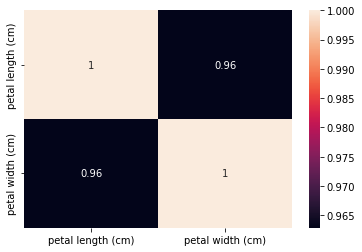

In [15]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [12]:
num_attr = df.columns
target = df.columns[-1]

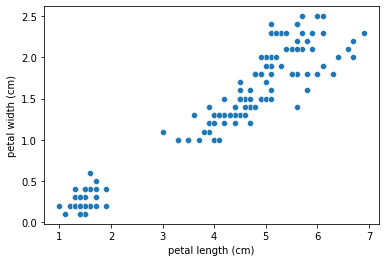

In [17]:
# Scatter Plot

sns.scatterplot(x = num_attr[0], y = target, data = df)
plt.show()

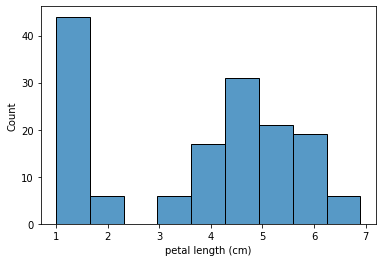

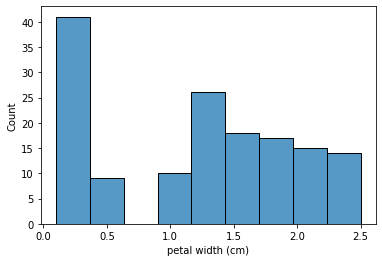

In [19]:
# Histogram

for attr in num_attr:
    sns.histplot(x = attr, data = df)
    plt.show()

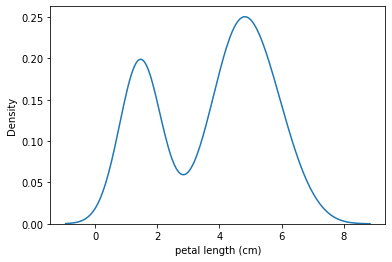

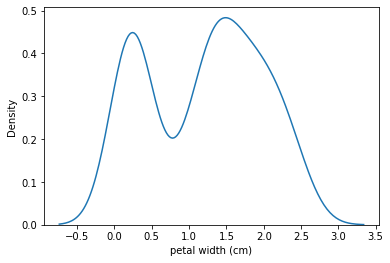

In [21]:
# Kernel Density Plot

for attr in num_attr:
    sns.kdeplot(x = attr, data = df)
    plt.show()

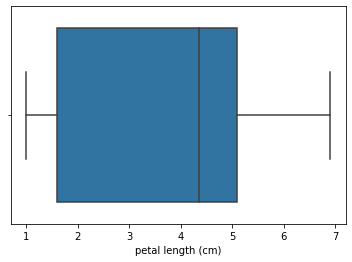

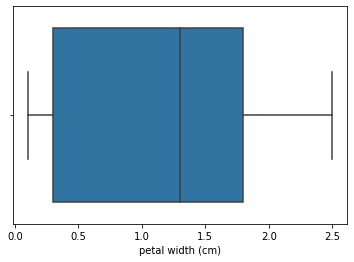

In [23]:
# Box Plot (Identifying Skewness)

for attr in num_attr:
    sns.boxplot(x = attr, data = df)
    plt.show()

In [26]:
print(f"Median {num_attr[0]} : {df[num_attr[0]].median()}")
print(f"Median {num_attr[1]} : {df[num_attr[1]].median()}")

Median petal length (cm) : 4.35
Median petal width (cm) : 1.3


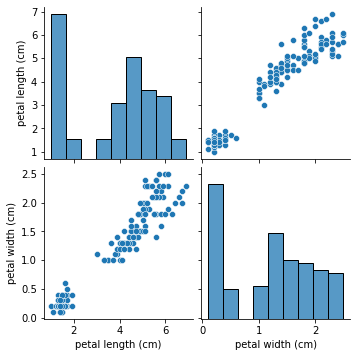

In [22]:
sns.pairplot(df)
plt.show()

### Data Preprocessing and Preparation

In [30]:
X = df.drop(target, axis = 1).values
y = df[target].values

In [32]:
# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 3)

In [36]:
print("Train Size :", y_train.shape[0])
print("Test Size :", y_test.shape[0])

Train Size : 120
Test Size : 30


In [101]:
# Creating a data transformation pipeline for feature scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler())
])

In [102]:
# Scaling the features

X_train_scaled = p.fit_transform(X_train)
X_test_scaled = p.fit_transform(X_test)

y_train_scaled = p.fit_transform(y_train.reshape(-1, 1))[:, 0]
y_test_scaled = p.fit_transform(y_test.reshape(-1, 1))[:, 0]

### Training the Model and Evaluating it's Performance

In [134]:
# Implementing Stochastic Gradient Descent Regressor from scratch

class SGDRegressor:
    
    def __init__(self, t0 = 5, t1 = 50, n_epochs = 100):
        self.t0, self.t1 = t0, t1
        self.n_epochs = n_epochs
        self.w = self.b = None
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for epoch in range(self.n_epochs):
            for i in range(n):
                rand_idx = np.random.randint(n)
                X_ = X[rand_idx: rand_idx + 1]
                y_ = y[rand_idx: rand_idx + 1]
                y_pred = np.dot(X_, self.w) + self.b
                dw = np.dot(X_.T, y_pred - y_)
                db = np.sum(y_pred - y_)
                lr = self.learning_schedule(self.n_epochs * n + i)
                self.w -= lr * dw
                self.b -= lr * db
    
    def predict(self, X):
        y_pred = np.dot(X, self.w) + self.b
        return y_pred
    
    def learning_schedule(self, t):
        return self.t0 / (self.t1 + t)

In [140]:
# Training the Regressor

reg = SGDRegressor()

reg.fit(X_train_scaled, y_train_scaled)

print(reg.w, reg.b)

[0.95605452] 0.002205977152655502


In [136]:
y_train_pred = reg.predict(X_train_scaled)

train_score = metrics.r2_score(y_train_scaled, y_train_pred)

print("Train Score (Co-efficient of Determination) :", train_score)

Train Score (Co-efficient of Determination) : 0.9291079320623855


#### Sklearn Implementation

In [138]:
model = linear_model.SGDRegressor()

model.fit(X_train_scaled, y_train_scaled)

SGDRegressor()

In [139]:
y_train_pred = model.predict(X_train_scaled)

train_score = metrics.r2_score(y_train_scaled, y_train_pred)

print("Train Score (Co-efficient of Determination) :", train_score)

Train Score (Co-efficient of Determination) : 0.9285414625182772


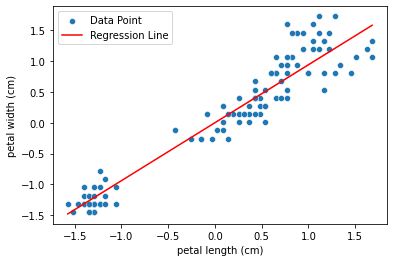

In [146]:
# Line of Regression

plt.xlabel(num_attr[0])
plt.ylabel(target)
sns.scatterplot(x = X_train_scaled[:, 0], y = y_train_scaled, label = "Data Point")
sns.lineplot(x = X_train_scaled[:, 0], y = y_train_pred, color = "red", label = "Regression Line")
plt.legend()
plt.show()

### Validating the Model

In [157]:
y_test_pred = reg.predict(X_test_scaled)

test_score = metrics.r2_score(y_test_scaled, y_test_pred)

print("Test Score (Co-efficient of Determination) :", test_score)

Test Score (Co-efficient of Determination) : 0.9198267483086429
